Reference for more detais: https://colab.research.google.com/drive/1m2cg3D1x3j5vrFc-Cu0gMvc48gWyCOuG#forceEdit=true&sandboxMode=true

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

The cool thing is keras comes pre installed with datasets. Let us use one of them and work on it right now - Fashion MNIST. This is a good beginner testing data set

In [3]:
#Load in the data

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'] # each match an integer ranging from 0-9

In [4]:
print(test_images.shape) #does not need peraentheses becasue we are accessing an attribute, not a method like .reshape()
#the outout will be (# of images, height of the image in pixels, width in pixels)
type(train_images) # to check that its of type numpy array

(10000, 28, 28)


numpy.ndarray

Our training dataset has 60,000 images, and each image is made of 28x28 pixels (thats 784)

In [5]:
train_images[30000,14,14] #the first index is which picture in the 60,000 image dataset, the second two sepcifcy the pixel in that image

218

Each pixel value is in between 0 and 225, 0 is black and 225 is white. No other color channels

In [6]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

So each of the above integers range from 0-9. These are the labels - essentially what each training image is supposed to be. Let us create an array of label names to indicate which is which

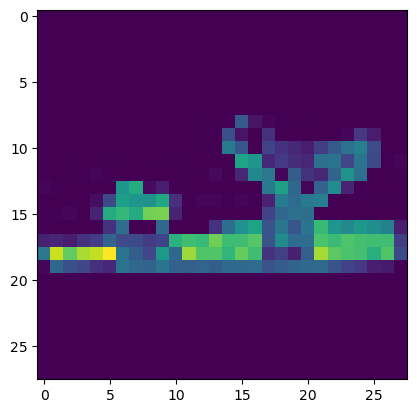

In [7]:
plt.imshow(train_images[59999]) # This is the 59,999th image in the data set

Data preprocessing is the last step before creating our model. We can do this by just scaling every pixel to be between 0-1 instead of 0-22. This can be done by simply diving all the values by 225, since each pixel value is in between 0 and 225, 0 is black and 225 is white

In [20]:
train_images = train_images / 225.0

test_images = test_images / 225.0
train_images[30456,15,10] #so now this is in between 0-1 just to see as an example
# (which image #, height of the image in pixels, width in pixels) its 28 x 28 pixels

9.202296990544555e-20

Now for the model...

In [10]:
model = keras.Sequential([ #sequential just refers to the way neural networks move information from left to right passing through the layers
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2) - dense means every neuron in the previous layer (the one above) is connected to every neuron in the current layer. relu is the activation function (rectifies linear unit), and 128 is the number of neurons
    keras.layers.Dense(10, activation='softmax') # output layer (3) - we have 10 output neurons becuase we have 10 differnet classes that we are predicting in the output. Softmax makes sure that all of the values of the neruons adds up to 1 and that each of them are between 0 and 1
])

/Users/dev/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

We just built the architecture of our neural network above, let us now define the loss function, optimizer and metrics we would like to track.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

Now for the training of the model

In [11]:
model.fit(train_images, train_labels, epochs=10) #keras automaticall shuffles the data for every epoch

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7828 - loss: 0.6284
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 992us/step - accuracy: 0.8627 - loss: 0.3790
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8729 - loss: 0.3464
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8844 - loss: 0.3135
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8900 - loss: 0.2937
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8976 - loss: 0.2756
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 0.9009 - loss: 0.2679
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9032 - loss: 0.2552
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9056 - loss: 0.2475
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9102 - loss: 0.2323


So our accuracy in the last epoch came out to be 92%. Amazing!! Hold on - if we want to find out what the true accuracy is , we need to test it on our testing data sets. For our epoch runs, we only used it on the training data sets! Lets test it on something our neural network has never faced!

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 822us/step - accuracy: 0.8439 - loss: 69.2656


We have to now make predictions

In [19]:
predictions = model.predict(test_images)
print(predictions)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 378us/step
[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Lets focus on just one of the images out of the 10,000 test images - the first one

In [20]:
print(predictions[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Basically the above array is telling us the probabilities of each of the labels (the different types of fashion items) that were on the output layer of our neural network. The idea is that the correct label that is being predicted for this first image is the one with the highest probability in that array. So let us find the max value

In [21]:
print(np.argmax(predictions[0]))

9


But which label was index 9 you ask?

In [21]:
print(class_names[np.argmax(predictions[789])])

Sneaker


And lets also verify this visually to make sure it really is an ankle boot

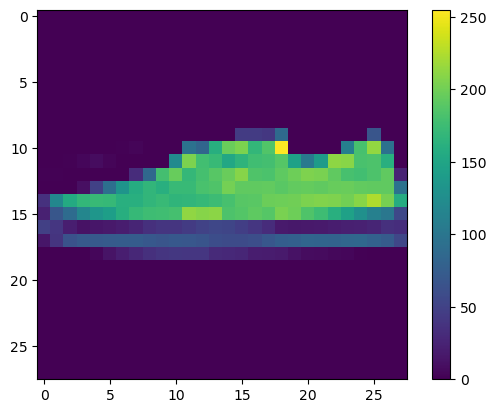

In [22]:
plt.figure()
plt.imshow(test_images[789])
plt.colorbar()
plt.grid(False)
plt.show()

In [1]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()
  print("Excpected: " + label)
  print("Guess: " + guess)


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)

NameError: name 'plt' is not defined